<a href="https://colab.research.google.com/github/Arnav55/ML-Lab/blob/main/Assigment4_ML_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = np.array([
    [2.5,2.4,1.2],
    [0.5,0.7,0.3],
    [2.2,2.9,1.4],
    [1.9,2.2,1.1],
    [3.1,3.0,1.7],
    [3.4,2.3,2.7],
    [3.1,1.1,0.4],
    [2.1,2.3,0.7],
    [1.1,0.2,1.2],
    [2.2,3.2,3.3]
])
df = pd.DataFrame(data,columns=["X","Y","Z"])
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,3.4,2.3,2.7
6,3.1,1.1,0.4
7,2.1,2.3,0.7
8,1.1,0.2,1.2
9,2.2,3.2,3.3


In [ ]:
standardized_data = (df - df.mean()) / df.std()

In [ ]:
cov_matrix = np.cov(standardized_data.T)

In [ ]:
elg_vals, elg_vecs = np.linalg.eig(cov_matrix)

In [ ]:
sorted_indices = np.argsort(elg_vals)[::-1]
elg_vals = elg_vals[sorted_indices]
elg_vecs = elg_vecs[:, sorted_indices]

In [ ]:
eig_vecs_subset  = elg_vecs[:, :2]

In [ ]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])

In [15]:
print("\nReduced Data (after PCA):\n",reduced_df)



Reduced Data (after PCA):
         PC1       PC2
0 -0.281957 -0.354975
1  2.489407  0.582565
2 -0.521302  0.062925
3  0.261370  0.062399
4 -1.303450 -0.472764
5 -1.649989 -0.079796
6  0.614285 -1.484081
7  0.315403 -0.371980
8  1.898979  0.670196
9 -1.822747  1.385511


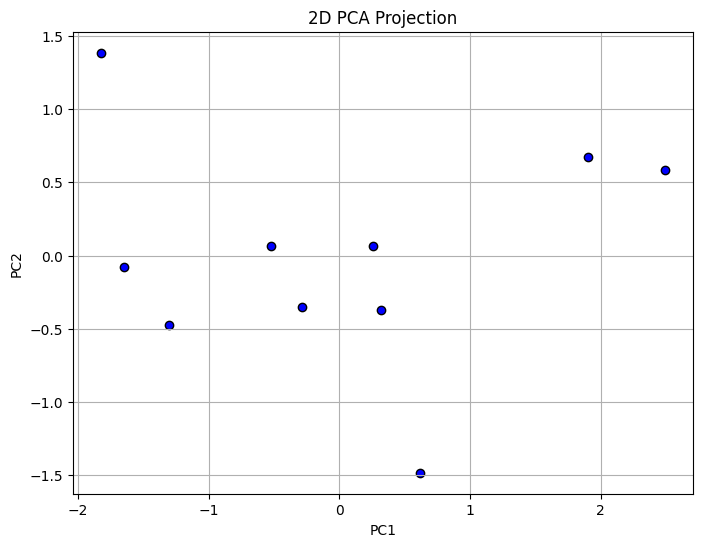

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'],reduced_df['PC2'],c='blue',edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()